In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_location = 'C:/Windows/Fonts/malgunbd.ttf' # matplotlib 한글 맑은 고딕 폰트 설정
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# SKT 유동인구 데이터 / 2020년 지하철 승하차 인원 데이터 로드

In [2]:
# 2019년 데이터
time1902= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_TIME_201902.CSV', sep = '|')
time1903= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_TIME_201903.CSV', sep = '|')
time1904= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_TIME_201904.CSV', sep = '|')
time1905= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_TIME_201905.CSV', sep = '|')

# 2020년 데이터
time2002= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_TIME_202002.CSV', sep = '|')
time2003= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_TIME_202003.CSV', sep = '|')
time2004= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_TIME_202004.CSV', sep = '|')
time2005= pd.read_csv(r'C:\Users\sb\TIL\TIL\01_유동인구데이터(SK텔레콤)\4개지역_FLOW_TIME_202005.CSV', sep = '|')

# 2020년 지하철 승하차인원 데이터
subway_2020 = pd.read_csv('서울교통공사_1_8호선일별역별시간대별승하차인원_202001_202008.csv', encoding='cp949')

In [3]:
# 2020년 유동인구 데이터 concat
Udong_2020 = pd.concat([time2002, time2003, time2004, time2005])

# 유동인구데이터, 지하철데이터 날짜 칼럼 datetime 변환
Udong_2020['STD_YMD'] = pd.to_datetime(Udong_2020['STD_YMD'].astype(str))
subway_2020['날짜'] = pd.to_datetime(subway_2020['날짜'])

## 유동인구데이터와 지하철데이터 날짜, 시간 매칭

In [4]:
start = subway_2020[subway_2020['날짜'] == '2020-02-01'].index[0]
print('시작 인덱스 :',start)
finish = subway_2020[subway_2020['날짜'] == '2020-05-31'].index[-1]
print('끝 인덱스 :', finish)

시작 인덱스 : 17086
끝 인덱스 : 83755


In [5]:
# 지하철 2월부터 5월까지의 데이터
subway_2020 = subway_2020.loc[17086:83755]

In [6]:
Udong_2020.columns[9:], subway_2020.columns[5:-1]

(Index(['TMST_05', 'TMST_06', 'TMST_07', 'TMST_08', 'TMST_09', 'TMST_10',
        'TMST_11', 'TMST_12', 'TMST_13', 'TMST_14', 'TMST_15', 'TMST_16',
        'TMST_17', 'TMST_18', 'TMST_19', 'TMST_20', 'TMST_21', 'TMST_22',
        'TMST_23'],
       dtype='object'),
 Index(['06시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11',
        '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17',
        '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23',
        '23 ~ 24'],
       dtype='object'))

In [7]:
#유동인구 시간 컬럼
Udong_time_col = Udong_2020.columns[9:]

#지하철 시간 컬럼
subway_time_col = subway_2020.columns[5:-1]

In [8]:
#행정동, 날짜로 groupby
Udong_2020 = Udong_2020.groupby(['HDONG_NM', 'STD_YMD'])[Udong_time_col].sum()
Udong_2020.columns = subway_time_col

In [9]:
#지하철 승하차 구분
subway_up = subway_2020[subway_2020['구분'] == '승차']
subway_down = subway_2020[subway_2020['구분'] == '하차']

#지하철역, 날짜로 groupby
subway_up = subway_up.groupby(['역명', '날짜'])[subway_time_col].sum()
subway_down = subway_down.groupby(['역명', '날짜'])[subway_time_col].sum()

#하차 - 승차 데이터
subway_updown = subway_down - subway_up

#하차 + 승차 데이터
subway_updown2 = subway_down + subway_up

In [10]:
subway_2020 = subway_2020.groupby(['역명', '날짜'])[subway_time_col].sum()

# 승하차데이터 (1) 
- 하차인구 - 승차인구

In [11]:
# 명동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['명동'].stack()
corr_df['지하철승하차'] = subway_updown.loc['을지로입구'].stack() + subway_updown.loc['명동'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.613185
지하철승하차,0.613185,1.000000


In [12]:
# 상계1동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['상계1동'].stack()
corr_df['지하철승하차'] = subway_updown.loc['수락산'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.221639
지하철승하차,0.221639,1.000000


In [13]:
# 상계3.4동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['상계3.4동'].stack()
corr_df['지하철승하차'] = subway_updown.loc['당고개'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.00000,0.24212
지하철승하차,0.24212,1.00000


In [14]:
# 상계8동, 상계9동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['상계8동'].stack() + Udong_2020.loc['상계9동'].stack()
corr_df['지하철승하차'] = subway_updown.loc['마들'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.348886
지하철승하차,0.348886,1.000000


In [15]:
# 신당동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['신당동'].stack()
corr_df['지하철승하차'] = subway_updown.loc['신당'].stack() +subway_updown.loc['청구'].stack() + subway_updown.loc['약수'].stack() + subway_updown.loc['버티고개'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.00000,0.51414
지하철승하차,0.51414,1.00000


In [16]:
# 을지로동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['을지로동'].stack()
corr_df['지하철승하차'] = subway_updown.loc['을지로3가'].stack() +subway_updown.loc['을지로4가'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.445931
지하철승하차,0.445931,1.000000


In [17]:
# 장충동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['장충동'].stack()
corr_df['지하철승하차'] = subway_updown.loc['동대입구'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.227939
지하철승하차,0.227939,1.000000


In [18]:
# 중계2.3동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['중계2.3동'].stack()
corr_df['지하철승하차'] = subway_updown.loc['중계'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.307896
지하철승하차,0.307896,1.000000


In [19]:
# 하계1동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['하계1동'].stack() + Udong_2020.loc['하계2동'].stack()
corr_df['지하철승하차'] = subway_updown.loc['하계'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.184451
지하철승하차,0.184451,1.000000


In [38]:
corr_df1 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df1['유동인구'] = Udong_2020.loc['명동'].stack()
corr_df1['지하철승하차'] = subway_updown.loc['을지로입구'].stack() + subway_updown.loc['명동'].stack()
corr_1 = corr_df1.corr()['유동인구']['지하철승하차']
     
corr_df2 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df2['유동인구'] = Udong_2020.loc['상계1동'].stack()
corr_df2['지하철승하차'] = subway_updown.loc['수락산'].stack()
corr_2 = corr_df2.corr()['유동인구']['지하철승하차']

corr_df3 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df3['유동인구'] = Udong_2020.loc['상계3.4동'].stack()
corr_df3['지하철승하차'] = subway_updown.loc['당고개'].stack()
corr_3 = corr_df3.corr()['유동인구']['지하철승하차']

corr_df4 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df4['유동인구'] = Udong_2020.loc['상계8동'].stack() + Udong_2020.loc['상계9동'].stack()
corr_df4['지하철승하차'] = subway_updown.loc['마들'].stack()
corr_4 = corr_df4.corr()['유동인구']['지하철승하차']

corr_df5 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df5['유동인구'] = Udong_2020.loc['신당동'].stack()
corr_df5['지하철승하차'] = subway_updown.loc['신당'].stack() +subway_updown.loc['청구'].stack() + subway_updown.loc['약수'].stack() + subway_updown.loc['버티고개'].stack()
corr_5 = corr_df5.corr()['유동인구']['지하철승하차']

corr_df6 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df6['유동인구'] = Udong_2020.loc['을지로동'].stack()
corr_df6['지하철승하차'] = subway_updown.loc['을지로3가'].stack() +subway_updown.loc['을지로4가'].stack()
corr_6 = corr_df6.corr()['유동인구']['지하철승하차']

corr_df7 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df7['유동인구'] = Udong_2020.loc['장충동'].stack()
corr_df7['지하철승하차'] = subway_updown.loc['동대입구'].stack()
corr_7 = corr_df7.corr()['유동인구']['지하철승하차']

corr_df8 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df8['유동인구'] = Udong_2020.loc['중계2.3동'].stack()
corr_df8['지하철승하차'] = subway_updown.loc['중계'].stack()
corr_8 = corr_df8.corr()['유동인구']['지하철승하차']

corr_df9 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df9['유동인구'] = Udong_2020.loc['하계1동'].stack() + Udong_2020.loc['하계2동'].stack()
corr_df9['지하철승하차'] = subway_updown.loc['하계'].stack()
corr_9 = corr_df9.corr()['유동인구']['지하철승하차']

In [39]:
print('지하철 승차-하차 상관관계: {}'.format((corr_1 + corr_2 + corr_3 + corr_4 + corr_5 + corr_6 + corr_7 + corr_8 + corr_9)/9))

지하철 승차-하차 상관관계: 0.3451320096727309


# 승하차데이터(2)
- 승차인구 + 하차인구

In [24]:
# 명동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['명동'].stack()
corr_df['지하철승하차'] = subway_updown2.loc['을지로입구'].stack() + subway_updown2.loc['명동'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.834932
지하철승하차,0.834932,1.000000


In [25]:
# 상계1동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['상계1동'].stack()
corr_df['지하철승하차'] = subway_updown2.loc['수락산'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.657367
지하철승하차,0.657367,1.000000


In [26]:
# 상계3.4동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['상계3.4동'].stack()
corr_df['지하철승하차'] = subway_updown2.loc['당고개'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.490023
지하철승하차,0.490023,1.000000


In [27]:
# 상계8동, 상계9동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['상계8동'].stack() + Udong_2020.loc['상계9동'].stack()
corr_df['지하철승하차'] = subway_updown2.loc['마들'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.00000,0.50222
지하철승하차,0.50222,1.00000


In [28]:
# 신당동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['신당동'].stack()
corr_df['지하철승하차'] = subway_updown2.loc['신당'].stack() +subway_updown2.loc['청구'].stack() + subway_updown2.loc['약수'].stack() + subway_updown2.loc['버티고개'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.00000,0.89065
지하철승하차,0.89065,1.00000


In [29]:
# 을지로동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['을지로동'].stack()
corr_df['지하철승하차'] = subway_updown2.loc['을지로3가'].stack() +subway_updown2.loc['을지로4가'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.922722
지하철승하차,0.922722,1.000000


In [31]:
# 장충동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['장충동'].stack()
corr_df['지하철승하차'] = subway_updown2.loc['동대입구'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.805244
지하철승하차,0.805244,1.000000


In [32]:
# 중계2.3동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['중계2.3동'].stack()
corr_df['지하철승하차'] = subway_updown2.loc['중계'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.540372
지하철승하차,0.540372,1.000000


In [33]:
# 하계1동
corr_df = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df['유동인구'] = Udong_2020.loc['하계1동'].stack() + Udong_2020.loc['하계2동'].stack()
corr_df['지하철승하차'] = subway_updown2.loc['하계'].stack()
corr_df.corr()

,유동인구,지하철승하차
유동인구,1.000000,0.759292
지하철승하차,0.759292,1.000000


In [40]:
corr_df1 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df1['유동인구'] = Udong_2020.loc['명동'].stack()
corr_df1['지하철승하차'] = subway_updown2.loc['을지로입구'].stack() + subway_updown2.loc['명동'].stack()
corr_1 = corr_df1.corr()['유동인구']['지하철승하차']
     
corr_df2 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df2['유동인구'] = Udong_2020.loc['상계1동'].stack()
corr_df2['지하철승하차'] = subway_updown2.loc['수락산'].stack()
corr_2 = corr_df2.corr()['유동인구']['지하철승하차']

corr_df3 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df3['유동인구'] = Udong_2020.loc['상계3.4동'].stack()
corr_df3['지하철승하차'] = subway_updown2.loc['당고개'].stack()
corr_3 = corr_df3.corr()['유동인구']['지하철승하차']

corr_df4 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df4['유동인구'] = Udong_2020.loc['상계8동'].stack() + Udong_2020.loc['상계9동'].stack()
corr_df4['지하철승하차'] = subway_updown2.loc['마들'].stack()
corr_4 = corr_df4.corr()['유동인구']['지하철승하차']

corr_df5 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df5['유동인구'] = Udong_2020.loc['신당동'].stack()
corr_df5['지하철승하차'] = subway_updown2.loc['신당'].stack() +subway_updown2.loc['청구'].stack() + subway_updown2.loc['약수'].stack() + subway_updown2.loc['버티고개'].stack()
corr_5 = corr_df5.corr()['유동인구']['지하철승하차']

corr_df6 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df6['유동인구'] = Udong_2020.loc['을지로동'].stack()
corr_df6['지하철승하차'] = subway_updown2.loc['을지로3가'].stack() +subway_updown2.loc['을지로4가'].stack()
corr_6 = corr_df6.corr()['유동인구']['지하철승하차']

corr_df7 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df7['유동인구'] = Udong_2020.loc['장충동'].stack()
corr_df7['지하철승하차'] = subway_updown2.loc['동대입구'].stack()
corr_7 = corr_df7.corr()['유동인구']['지하철승하차']

corr_df8 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df8['유동인구'] = Udong_2020.loc['중계2.3동'].stack()
corr_df8['지하철승하차'] = subway_updown2.loc['중계'].stack()
corr_8 = corr_df8.corr()['유동인구']['지하철승하차']

corr_df9 = pd.DataFrame(columns = ['유동인구', '지하철승하차'])
corr_df9['유동인구'] = Udong_2020.loc['하계1동'].stack() + Udong_2020.loc['하계2동'].stack()
corr_df9['지하철승하차'] = subway_updown2.loc['하계'].stack()
corr_9 = corr_df9.corr()['유동인구']['지하철승하차']

In [41]:
print('지하철 승차 + 하차 상관관계: {}'.format((corr_1 + corr_2 + corr_3 + corr_4 + corr_5 + corr_6 + corr_7 + corr_8 + corr_9)/9))

지하철 승차+하차 상관관계: 0.711424616527692


# 하차데이터

## 명동

In [44]:
corr_df = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df['유동인구'] = Udong_2020.loc['명동'].stack()
corr_df['지하철하차'] = subway_down.loc['을지로입구'].stack() + subway_down.loc['명동'].stack()
corr_df.corr()

,유동인구,지하철하차
유동인구,1.000000,0.949101
지하철하차,0.949101,1.000000


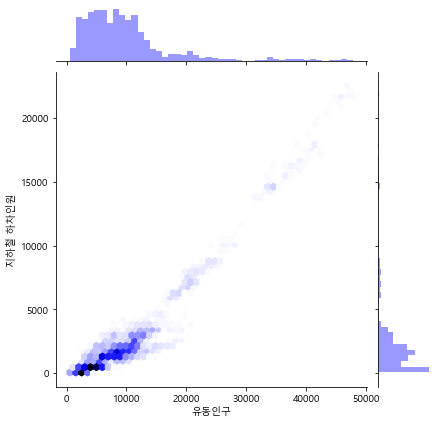

In [47]:
ax = sns.jointplot(x = corr_df['유동인구'], y = corr_df['지하철하차'], kind='hex', color='b')
ax.set_axis_labels(xlabel = '유동인구', ylabel='지하철 하차인원')

## 상계1동

In [48]:
corr_df = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df['유동인구'] = Udong_2020.loc['상계1동'].stack()
corr_df['지하철하차'] = subway_down.loc['수락산'].stack()
corr_df.corr()

,유동인구,지하철하차
유동인구,1.000000,0.664154
지하철하차,0.664154,1.000000


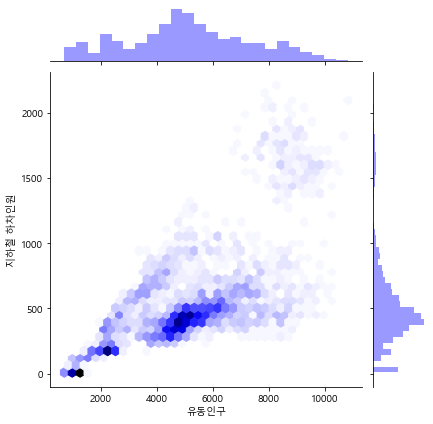

In [49]:
ax = sns.jointplot(x = corr_df['유동인구'], y = corr_df['지하철하차'], kind='hex', color='b')
ax.set_axis_labels(xlabel = '유동인구', ylabel='지하철 하차인원')

## 상계3.4동

In [54]:
corr_df = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df['유동인구'] = Udong_2020.loc['상계3.4동'].stack()
corr_df['지하철하차'] = subway_down.loc['당고개'].stack()
corr_df.corr()

,유동인구,지하철하차
유동인구,1.000000,0.625168
지하철하차,0.625168,1.000000


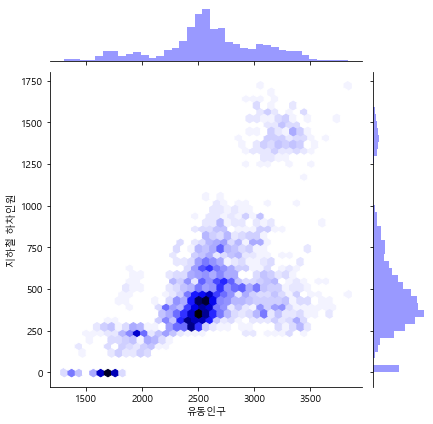

In [56]:
ax = sns.jointplot(x = corr_df['유동인구'], y = corr_df['지하철하차'], kind='hex', color='b')
ax.set_axis_labels(xlabel = '유동인구', ylabel='지하철 하차인원')

## 상계8동 + 상계9동

In [61]:
corr_df = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df['유동인구'] = Udong_2020.loc['상계8동'].stack() + Udong_2020.loc['상계9동'].stack()
corr_df['지하철하차'] = subway_down.loc['마들'].stack()
corr_df.corr()

,유동인구,지하철하차
유동인구,1.000000,0.705404
지하철하차,0.705404,1.000000


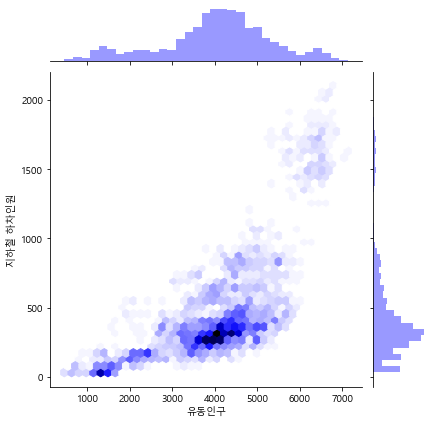

In [62]:
ax = sns.jointplot(x = corr_df['유동인구'], y = corr_df['지하철하차'], kind='hex', color='b')
ax.set_axis_labels(xlabel = '유동인구', ylabel='지하철 하차인원')

## 신당동

In [63]:
corr_df = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df['유동인구'] = Udong_2020.loc['신당동'].stack()
corr_df['지하철하차'] = subway_down.loc['신당'].stack() +subway_down.loc['청구'].stack() + subway_down.loc['약수'].stack() + subway_down.loc['버티고개'].stack()
corr_df.corr()

,유동인구,지하철하차
유동인구,1.00000,0.90512
지하철하차,0.90512,1.00000


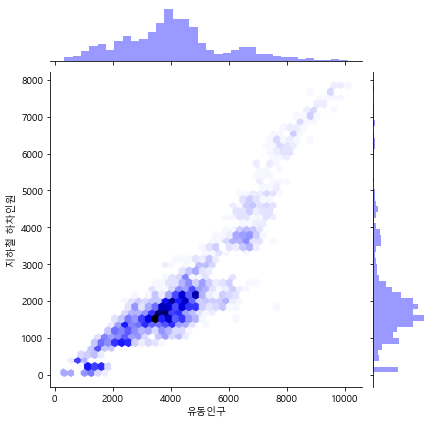

In [64]:
ax = sns.jointplot(x = corr_df['유동인구'], y = corr_df['지하철하차'], kind='hex', color='b')
ax.set_axis_labels(xlabel = '유동인구', ylabel='지하철 하차인원')

## 을지로동

In [65]:
corr_df = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df['유동인구'] = Udong_2020.loc['을지로동'].stack()
corr_df['지하철하차'] = subway_down.loc['을지로3가'].stack() +subway_down.loc['을지로4가'].stack()
corr_df.corr()

,유동인구,지하철하차
유동인구,1.000000,0.899459
지하철하차,0.899459,1.000000


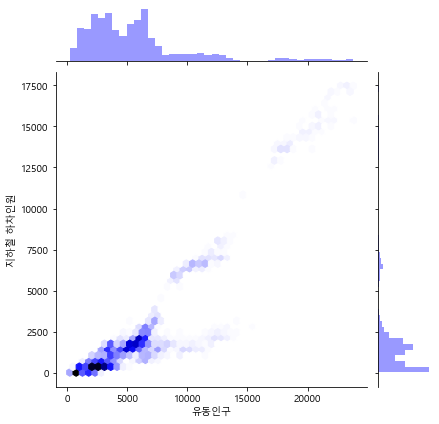

In [66]:
ax = sns.jointplot(x = corr_df['유동인구'], y = corr_df['지하철하차'], kind='hex', color='b')
ax.set_axis_labels(xlabel = '유동인구', ylabel='지하철 하차인원')

## 장충동

In [67]:
corr_df = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df['유동인구'] = Udong_2020.loc['장충동'].stack()
corr_df['지하철하차'] = subway_down.loc['동대입구'].stack()
corr_df.corr()

,유동인구,지하철하차
유동인구,1.000000,0.678094
지하철하차,0.678094,1.000000


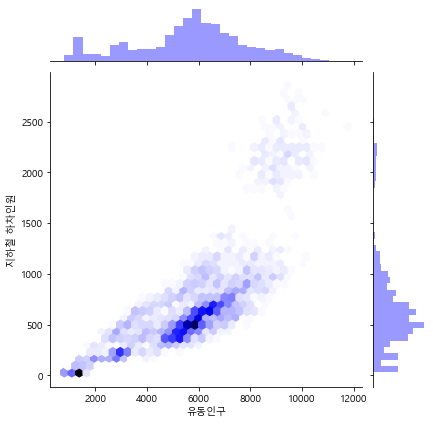

In [71]:
ax = sns.jointplot(x = corr_df['유동인구'], y = corr_df['지하철하차'], kind='hex', color='b')
ax.set_axis_labels(xlabel = '유동인구', ylabel='지하철 하차인원')

## 중계2.3동

In [68]:
corr_df = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df['유동인구'] = Udong_2020.loc['중계2.3동'].stack()
corr_df['지하철하차'] = subway_down.loc['중계'].stack()
corr_df.corr()

,유동인구,지하철하차
유동인구,1.000000,0.749307
지하철하차,0.749307,1.000000


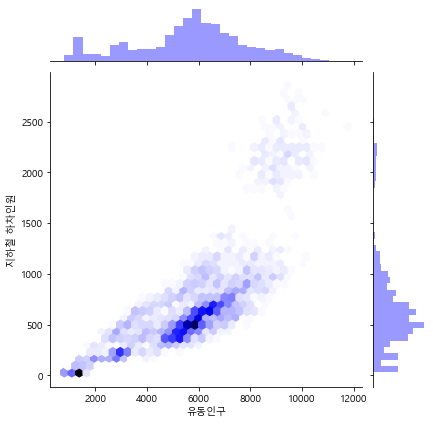

In [72]:
ax = sns.jointplot(x = corr_df['유동인구'], y = corr_df['지하철하차'], kind='hex', color='b')
ax.set_axis_labels(xlabel = '유동인구', ylabel='지하철 하차인원')

## 하계1동, 하계2동

In [74]:
corr_df = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df['유동인구'] = Udong_2020.loc['하계1동'].stack() + Udong_2020.loc['하계2동'].stack()
corr_df['지하철하차'] = subway_down.loc['하계'].stack()
corr_df.corr()

,유동인구,지하철하차
유동인구,1.000000,0.781337
지하철하차,0.781337,1.000000


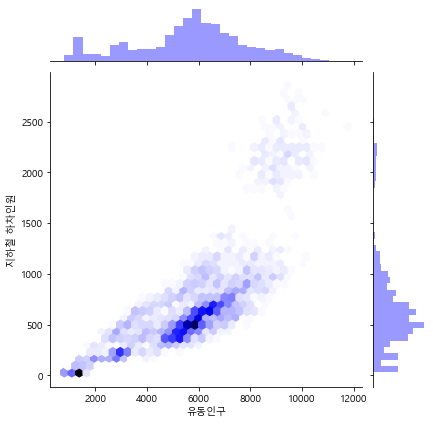

In [76]:
ax = sns.jointplot(x = corr_df['유동인구'], y = corr_df['지하철하차'], kind='hex', color='b')
ax.set_axis_labels(xlabel = '유동인구', ylabel='지하철 하차인원')

In [77]:
corr_df1 = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df1['유동인구'] = Udong_2020.loc['명동'].stack()
corr_df1['지하철하차'] = subway_down.loc['을지로입구'].stack() + subway_down.loc['명동'].stack()
corr_1 = corr_df1.corr()['유동인구']['지하철하차']
     
corr_df2 = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df2['유동인구'] = Udong_2020.loc['상계1동'].stack()
corr_df2['지하철하차'] = subway_down.loc['수락산'].stack()
corr_2 = corr_df2.corr()['유동인구']['지하철하차']

corr_df3 = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df3['유동인구'] = Udong_2020.loc['상계3.4동'].stack()
corr_df3['지하철하차'] = subway_down.loc['당고개'].stack()
corr_3 = corr_df3.corr()['유동인구']['지하철하차']

corr_df4 = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df4['유동인구'] = Udong_2020.loc['상계8동'].stack() + Udong_2020.loc['상계9동'].stack()
corr_df4['지하철하차'] = subway_down.loc['마들'].stack()
corr_4 = corr_df4.corr()['유동인구']['지하철하차']

corr_df5 = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df5['유동인구'] = Udong_2020.loc['신당동'].stack()
corr_df5['지하철하차'] = subway_down.loc['신당'].stack() +subway_down.loc['청구'].stack() + subway_down.loc['약수'].stack() + subway_down.loc['버티고개'].stack()
corr_5 = corr_df5.corr()['유동인구']['지하철하차']

corr_df6 = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df6['유동인구'] = Udong_2020.loc['을지로동'].stack()
corr_df6['지하철하차'] = subway_down.loc['을지로3가'].stack() +subway_down.loc['을지로4가'].stack()
corr_6 = corr_df6.corr()['유동인구']['지하철하차']

corr_df7 = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df7['유동인구'] = Udong_2020.loc['장충동'].stack()
corr_df7['지하철하차'] = subway_down.loc['동대입구'].stack()
corr_7 = corr_df7.corr()['유동인구']['지하철하차']

corr_df8 = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df8['유동인구'] = Udong_2020.loc['중계2.3동'].stack()
corr_df8['지하철하차'] = subway_down.loc['중계'].stack()
corr_8 = corr_df8.corr()['유동인구']['지하철하차']

corr_df9 = pd.DataFrame(columns = ['유동인구', '지하철하차'])
corr_df9['유동인구'] = Udong_2020.loc['하계1동'].stack() + Udong_2020.loc['하계2동'].stack()
corr_df9['지하철하차'] = subway_down.loc['하계'].stack()
corr_9 = corr_df9.corr()['유동인구']['지하철하차']

In [78]:
print('지하철 하차 상관관계: {}'.format((corr_1 + corr_2 + corr_3 + corr_4 + corr_5 + corr_6 + corr_7 + corr_8 + corr_9)/9))

지하철 하차 상관관계: 0.7730161224779233
